In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [2]:
np.random.seed(1)

X = np.random.rand(50,1)

y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3*(X) + \
    0.4*np.random.rand(50, 1) 

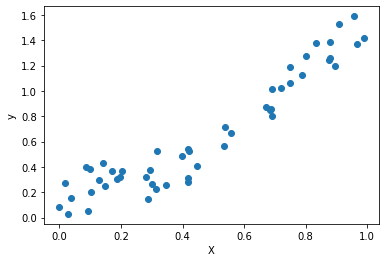

In [3]:
plt.figure()

plt.scatter(X, y)

plt.xlabel("X")
plt.ylabel("y")
plt.show()

#### Linear Regression

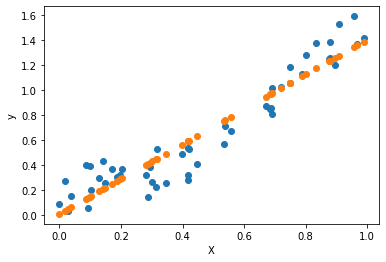

0.8919326382437994

In [4]:
model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

plt.figure()

plt.scatter(X, y, label="Data")
plt.scatter(X, y_pred, label="Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

model.score(X, y) 

#### Polynomial Regression of Degree 2

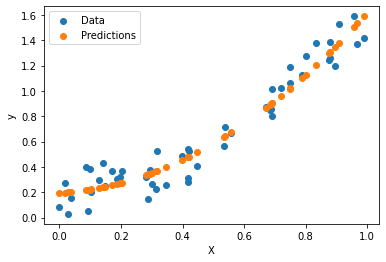

0.937213227713278

In [5]:
X_deg2 = np.hstack([X, X**2])

model.fit(X_deg2,y)

y_pred = model.predict(X_deg2)

plt.figure()

plt.scatter(X, y, label ='Data')
plt.scatter(X, y_pred, label = 'Predictions')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

model.score(X_deg2, y)

#### Polynomial Regression of Degree 3

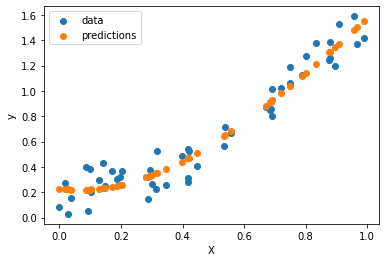

0.9384895307987051

In [6]:
X_deg3 = np.hstack([X, X**2, X**3])


model.fit(X_deg3, y)

y_pred = model.predict(X_deg3)

plt.scatter(X,y, label ="data")
plt.scatter(X, y_pred, label ="predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

model.score(X_deg3, y)


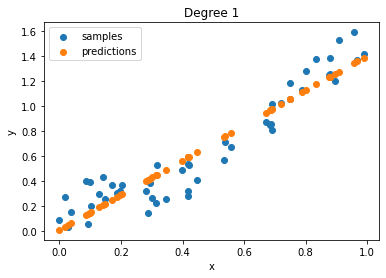

0.8919326382437994

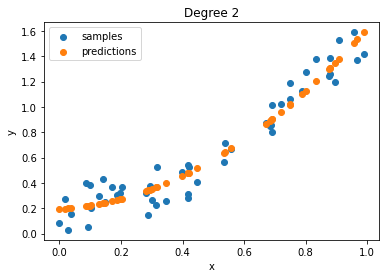

0.937213227713278

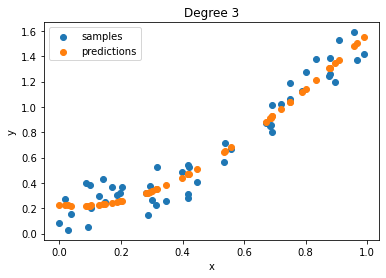

0.9384895307987051

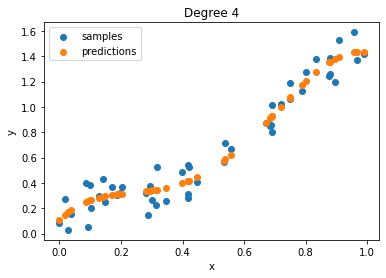

0.950995835560793

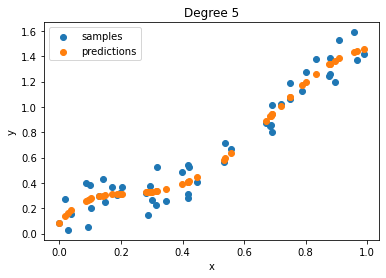

0.9515258649694079

In [7]:
scores = []

for i in range(1,6):
    poly = PolynomialFeatures(i)
    scalar = StandardScaler()
    X_poly = poly.fit_transform(X)

    X_poly_scaled = scalar.fit_transform(X_poly)

    model = LinearRegression()

    model.fit(X_poly_scaled, y)

    output = model.predict(X_poly_scaled)

    fig = plt.figure()
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="predictions")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Degree {i}")
    plt.legend()
    plt.show()

    display(model.score(X_poly_scaled, y))
    scores.append(model.score(X_poly_scaled,y))


## Generalization

In [8]:
np.random.seed(1)

X = np.random.rand(100, 1)

y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3*(X) + \
    0.4*np.random.rand(100, 1)

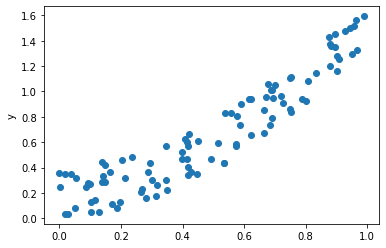

In [9]:
plt.figure()
plt.scatter(X,y)
plt.ylabel("X")
plt.ylabel("y")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

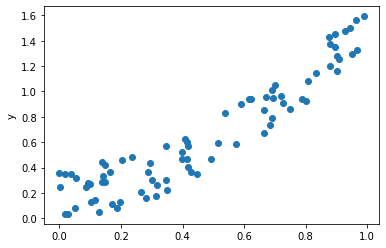

In [12]:
plt.figure()
plt.scatter(X_train,y_train)
plt.ylabel("X")
plt.ylabel("y")
plt.show()

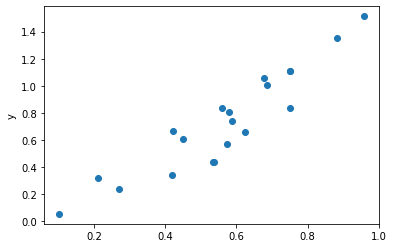

In [13]:
plt.figure()
plt.scatter(X_test,y_test)
plt.ylabel("X")
plt.ylabel("y")
plt.show()

In [14]:
from sklearn.pipeline import make_pipeline
degree = 5
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scalar, LinearRegression())

polyreg_scaled.fit(X_train, y_train)

print(polyreg_scaled.score(X_train, y_train))
print(polyreg_scaled.score(X_test, y_test))

0.9214962587812688
0.8656262710391975


In [15]:
from sklearn.pipeline import make_pipeline
degree = 30
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scalar, LinearRegression())

polyreg_scaled.fit(X_train, y_train)

display(polyreg_scaled.score(X_train, y_train))
display(polyreg_scaled.score(X_test, y_test))

0.9368815103624989

0.8041643514331955

Above model is an overfitted model, because it is performing well on the training dataset but it is not performing well on the test dataset

In [16]:
from sklearn.pipeline import make_pipeline

degree = 5 
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scalar, LinearRegression())

polyreg_scaled.fit(X_train, y_train)

display(polyreg_scaled.score(X_train, y_train))
display(polyreg_scaled.score(X_test, y_test))

0.9214962587812688

0.8656262710391975

Above model is moderate fitted model.

In [17]:
test_scores = []
train_scores = []
degree =32
for i in range(1, degree):
    polyreg_scaled = make_pipeline(PolynomialFeatures(i), scalar, LinearRegression())

    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train,y_train)
    test_score = polyreg_scaled.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

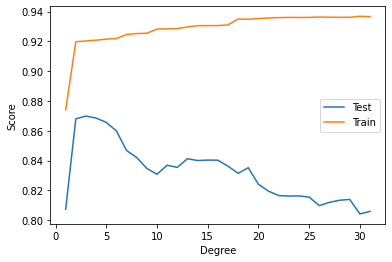

In [18]:
plt.figure()

plt.plot(list(range(1,degree)), test_scores, label = "Test")
plt.plot(list(range(1, degree)), train_scores, label ="Train")
plt.xlabel("Degree")
plt.ylabel("Score")
plt.legend()

plt.show()


<ul>
  <li>The plot displays training (blue) and testing (orange) performance (R-squared) for different polynomial degrees.</li>
  <li>Initially, as the polynomial degree increases, the training performance (R-squared) tends to improve steadily. This suggests that higher polynomial degrees allow the model to capture more complex patterns within the training data, leading to better fitting.</li>
  <li>However, beyond a certain point, typically around degree 5 in this case, the testing performance begins to decline despite the continued increase in the polynomial degree. This decline indicates that the model's ability to generalize to unseen data diminishes as the complexity of the model increases. In other words, the model starts to overfit the training data, resulting in poor performance on new, unseen data.</li>
</ul>

## Validation in Model Training

#### Validation Techniques

##### Basic Validation Split

Initially, the dataset is divided into training and test sets, typically in an 80-20 split. However, this approach can be problematic for smaller datasets, where insufficient training data may lead to biased models.

##### Cross-Validation

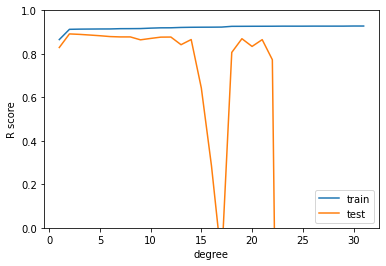

In [21]:
from sklearn.model_selection import KFold
kf =KFold(n_splits=10, shuffle=True, random_state=1)

degree =32

scalar = StandardScaler()
test_scores = []
train_scores = []

for i in range(1, degree):
    fold_test_score = []
    fold_train_score = []

    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        polyreg_scaled = make_pipeline(PolynomialFeatures(i),scalar,LinearRegression())

        polyreg_scaled.fit(X_train, y_train)

        train_score = polyreg_scaled.score(X_train, y_train)

        test_score = polyreg_scaled.score(X_test, y_test)

        fold_test_score.append(test_score)
        fold_train_score.append(train_score)

    train_score = np.mean(fold_train_score)
    test_score = np.mean(fold_test_score)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure()
plt.plot(list(range(1, 32)), train_scores, label="train")
plt.plot(list(range(1, 32)), test_scores, label="test")

plt.legend(loc="lower right")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("R score")
plt.show()




<ul>
  <li>Initially, as the degree of polynomial increases, both the training and testing scores tend to improve.</li>
  <li>This improvement is expected, as higher-degree polynomials can capture more complex relationships in the data.</li>
  <li>However, beyond a certain point, increasing the degree of polynomial may lead to overfitting, where the model learns noise in the data rather than the underlying pattern.</li>
  <li>This is indicated by a widening gap between the training and testing scores.</li>
  <li>The optimal degree of polynomial is the point where the testing score is maximized without a significant increase in the gap between training and testing scores.</li>
  <li>This point represents the best balance between bias and variance:</li>
<ul>
  <li>If the degree of polynomial is too low, the model may suffer from high bias, meaning it oversimplifies the underlying pattern in the data.</li>
  <li>If the degree of polynomial is too high, the model may suffer from high variance, meaning it fits the noise in the data rather than the underlying pattern, leading to poor generalization to new data.</li>
</ul>
</ul>